# Wikipedia.org website visit time
# First Dataset 145063 website

## 1.Import and set up enviroment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

### Now we will take a look inside this dataset

In [2]:
train = pd.read_csv("train_1.csv").fillna(0)

In [3]:
page = train['Page']

In [4]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [5]:
# downcast everything to Interger could make it smaller
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [6]:
type(page)

pandas.core.series.Series

In [7]:
#Dropping Page Column
train = train.drop('Page',axis = 1)

In [8]:
train.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [9]:
train.shape

(145063, 550)

In [10]:
train = train.astype(int)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 550 entries, 2015-07-01 to 2016-12-31
dtypes: int64(550)
memory usage: 608.7 MB


In [12]:
page.head(40)

0               2NE1_zh.wikipedia.org_all-access_spider
1                2PM_zh.wikipedia.org_all-access_spider
2                 3C_zh.wikipedia.org_all-access_spider
3            4minute_zh.wikipedia.org_all-access_spider
4     52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
5               5566_zh.wikipedia.org_all-access_spider
6             91Days_zh.wikipedia.org_all-access_spider
7              A'N'D_zh.wikipedia.org_all-access_spider
8              AKB48_zh.wikipedia.org_all-access_spider
9              ASCII_zh.wikipedia.org_all-access_spider
10             ASTRO_zh.wikipedia.org_all-access_spider
11    Ahq_e-Sports_Club_zh.wikipedia.org_all-access_...
12    All_your_base_are_belong_to_us_zh.wikipedia.or...
13           AlphaGo_zh.wikipedia.org_all-access_spider
14           Android_zh.wikipedia.org_all-access_spider
15        Angelababy_zh.wikipedia.org_all-access_spider
16             Apink_zh.wikipedia.org_all-access_spider
17          Apple_II_zh.wikipedia.org_all-access

In [13]:
def get_whatsearched(page):
    res = page.split('.')
    if res:
        return res[0][0:(len(res[0])-3)]
    return 'None'

In [14]:
get_whatsearched('2NE1_zh.wikipedia.org_all-access_spider')

'2NE1'

In [15]:
key = page.map(get_whatsearched)

In [16]:
key.head()

0                2NE1
1                 2PM
2                  3C
3             4minute
4    52_Hz_I_Love_You
Name: Page, dtype: object

In [17]:
type(key)

pandas.core.series.Series

### Search for all idol

In [18]:
key.value_counts()

                                                   408
1                                                  100
2                                                   95
User_talk:                                          54
User:                                               49
MediaWik                                            48
Georg                                               45
D                                                   39
Joh                                                 36
M                                                   32
Michae                                              31
YouTube                                             28
Facebook                                            28
Donald_Trump                                        27
Google                                              27
Special:Search                                      27
S                                                   26
Jame                                                24
Звёздные_в

In [19]:
key[key  == '2NE1'].index.tolist() 

[0, 27965, 60570, 105110]

In [20]:
key[key  == 'BIGBANG'].index.tolist() 

[23, 28140, 55874, 60597, 84929, 105183, 118704, 131952]

In [21]:
key[key  == 'BLACK_PINK'].index.tolist() 

[24, 27986, 60598, 105236]

In [22]:
key[key  == 'TWICE'].index.tolist() 

[147, 28109, 60734, 105171]

## 2. Preprocess features and values

In [23]:
#Using Data From Random Row for Training and Testing

row = train.iloc[147,:].values
# X is the previous of y (always)
X = row[0:549]
y = row[1:550]

In [24]:
X

array([   0,    0,    0,    0,    0,    0,  183,  187,  165,  305,   68,
        327,  142,   65,   15,   52,   16,   28,   54,   58,   41,   40,
         30,   88,   66,   10,    6,    6,   24,   76,   90,   10,   10,
          4,    8,   51,   44,    3,   30,   12,   22,    9,   19,    6,
        125,    9,    6,   49,   40,   39,    8,   39,   10,    4,   25,
         19,   11,    9,    9,   10,    4,    8,    5,   17,   12,    2,
          2,   35,    5,   31,   12,    9,    4,    6,    5,    5,   15,
         13,    9,   11,    9,   38,    6,   10,    3,    4,   11,    3,
          7,    4,    8,   12,   25,   22,   10,    5,    5,   28,   26,
         37,   16,  122,   13,   56,   78,   23,   30,   16,   30,   85,
        126,  338,  387,  150,  291,  362,  448,  248,  197,  157,  307,
        152,  251,  116,   67,   99,  145,  134,  156,  100,  179,  130,
        100,   76,  158,  201,   74,  109,   67,  109,   43,   67,   61,
         77,   63,   43,   97,  100,   88,   93,   

In [25]:
y

array([   0,    0,    0,    0,    0,  183,  187,  165,  305,   68,  327,
        142,   65,   15,   52,   16,   28,   54,   58,   41,   40,   30,
         88,   66,   10,    6,    6,   24,   76,   90,   10,   10,    4,
          8,   51,   44,    3,   30,   12,   22,    9,   19,    6,  125,
          9,    6,   49,   40,   39,    8,   39,   10,    4,   25,   19,
         11,    9,    9,   10,    4,    8,    5,   17,   12,    2,    2,
         35,    5,   31,   12,    9,    4,    6,    5,    5,   15,   13,
          9,   11,    9,   38,    6,   10,    3,    4,   11,    3,    7,
          4,    8,   12,   25,   22,   10,    5,    5,   28,   26,   37,
         16,  122,   13,   56,   78,   23,   30,   16,   30,   85,  126,
        338,  387,  150,  291,  362,  448,  248,  197,  157,  307,  152,
        251,  116,   67,   99,  145,  134,  156,  100,  179,  130,  100,
         76,  158,  201,   74,  109,   67,  109,   43,   67,   61,   77,
         63,   43,   97,  100,   88,   93,   38,  1

In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,\
                                                    random_state = 0)

In [27]:
X_train.shape

(384,)

In [28]:
# Feature Scaling using MinMaxScaler
# x' = (x - min(x))/(max(x)-min(x))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:
X_train.shape

(384, 1)

## 3. Model training and predict

In [30]:
#Reshaping Array
X_train = np.reshape(X_train, (384,1,1))

### Train model

In [31]:
# Importing the Keras libraries and packages for LSTM
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN

Using TensorFlow backend.


In [32]:
def build_LSTM():
    # Initialising the RNN
    model = Sequential()

    # Adding the input layerand the LSTM layer
    model.add(LSTM(units = 20, activation = 'elu', input_shape = (None, 1)))


    # Adding the output layer
    model.add(Dense(units = 1))

    # Compiling the RNN
    model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])
    
    return model

In [49]:
regressor = build_LSTM()

In [50]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

history = regressor.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,
  callbacks=[early_stop])

Train on 307 samples, validate on 77 samples
Epoch 1/1000
307/307 [==============================] - 1s 3ms/step - loss: 0.1143 - acc: 0.0130 - val_loss: 0.0908 - val_acc: 0.0000e+00
Epoch 2/1000
307/307 [==============================] - 0s 125us/step - loss: 0.0967 - acc: 0.0130 - val_loss: 0.0783 - val_acc: 0.0000e+00
Epoch 3/1000
307/307 [==============================] - 0s 125us/step - loss: 0.0859 - acc: 0.0130 - val_loss: 0.0709 - val_acc: 0.0000e+00
Epoch 4/1000
307/307 [==============================] - 0s 193us/step - loss: 0.0808 - acc: 0.0130 - val_loss: 0.0678 - val_acc: 0.0000e+00
Epoch 5/1000
307/307 [==============================] - 0s 145us/step - loss: 0.0779 - acc: 0.0130 - val_loss: 0.0673 - val_acc: 0.0000e+00
Epoch 6/1000
307/307 [==============================] - 0s 120us/step - loss: 0.0772 - acc: 0.0130 - val_loss: 0.0670 - val_acc: 0.0000e+00
Epoch 7/1000
307/307 [==============================] - 0s 128us/step - loss: 0.0767 - acc: 0.0130 - val_loss: 0.0666

Epoch 59/1000
307/307 [==============================] - 0s 147us/step - loss: 0.0584 - acc: 0.0130 - val_loss: 0.0576 - val_acc: 0.0000e+00
Epoch 60/1000
307/307 [==============================] - 0s 156us/step - loss: 0.0585 - acc: 0.0130 - val_loss: 0.0578 - val_acc: 0.0000e+00
Epoch 61/1000
307/307 [==============================] - 0s 155us/step - loss: 0.0585 - acc: 0.0130 - val_loss: 0.0576 - val_acc: 0.0000e+00
Epoch 62/1000
307/307 [==============================] - 0s 161us/step - loss: 0.0584 - acc: 0.0130 - val_loss: 0.0579 - val_acc: 0.0000e+00
Epoch 63/1000
307/307 [==============================] - 0s 169us/step - loss: 0.0584 - acc: 0.0130 - val_loss: 0.0577 - val_acc: 0.0000e+00
Epoch 64/1000
307/307 [==============================] - 0s 180us/step - loss: 0.0584 - acc: 0.0130 - val_loss: 0.0576 - val_acc: 0.0000e+00
Epoch 65/1000
307/307 [==============================] - 0s 123us/step - loss: 0.0583 - acc: 0.0130 - val_loss: 0.0577 - val_acc: 0.0000e+00
Epoch 66/1000

Epoch 117/1000
307/307 [==============================] - 0s 168us/step - loss: 0.0581 - acc: 0.0130 - val_loss: 0.0574 - val_acc: 0.0000e+00
Epoch 118/1000
307/307 [==============================] - 0s 169us/step - loss: 0.0583 - acc: 0.0130 - val_loss: 0.0572 - val_acc: 0.0000e+00
Epoch 119/1000
307/307 [==============================] - 0s 186us/step - loss: 0.0580 - acc: 0.0130 - val_loss: 0.0573 - val_acc: 0.0000e+00
Epoch 120/1000
307/307 [==============================] - 0s 188us/step - loss: 0.0578 - acc: 0.0130 - val_loss: 0.0572 - val_acc: 0.0000e+00
Epoch 121/1000
307/307 [==============================] - 0s 203us/step - loss: 0.0580 - acc: 0.0130 - val_loss: 0.0573 - val_acc: 0.0000e+00
Epoch 122/1000
307/307 [==============================] - 0s 144us/step - loss: 0.0579 - acc: 0.0130 - val_loss: 0.0572 - val_acc: 0.0000e+00
Epoch 123/1000
307/307 [==============================] - 0s 115us/step - loss: 0.0580 - acc: 0.0130 - val_loss: 0.0572 - val_acc: 0.0000e+00
Epoch 

Epoch 175/1000
307/307 [==============================] - 0s 123us/step - loss: 0.0575 - acc: 0.0130 - val_loss: 0.0569 - val_acc: 0.0000e+00
Epoch 176/1000
307/307 [==============================] - 0s 141us/step - loss: 0.0575 - acc: 0.0130 - val_loss: 0.0569 - val_acc: 0.0000e+00
Epoch 177/1000
307/307 [==============================] - 0s 101us/step - loss: 0.0575 - acc: 0.0130 - val_loss: 0.0570 - val_acc: 0.0000e+00
Epoch 178/1000
307/307 [==============================] - 0s 139us/step - loss: 0.0575 - acc: 0.0130 - val_loss: 0.0568 - val_acc: 0.0000e+00
Epoch 179/1000
307/307 [==============================] - 0s 127us/step - loss: 0.0574 - acc: 0.0130 - val_loss: 0.0568 - val_acc: 0.0000e+00
Epoch 180/1000
307/307 [==============================] - 0s 149us/step - loss: 0.0574 - acc: 0.0130 - val_loss: 0.0568 - val_acc: 0.0000e+00
Epoch 181/1000
307/307 [==============================] - 0s 111us/step - loss: 0.0574 - acc: 0.0130 - val_loss: 0.0569 - val_acc: 0.0000e+00
Epoch 

Epoch 233/1000
307/307 [==============================] - 0s 119us/step - loss: 0.0572 - acc: 0.0130 - val_loss: 0.0566 - val_acc: 0.0000e+00
Epoch 234/1000
307/307 [==============================] - 0s 141us/step - loss: 0.0577 - acc: 0.0130 - val_loss: 0.0567 - val_acc: 0.0000e+00
Epoch 235/1000
307/307 [==============================] - 0s 119us/step - loss: 0.0570 - acc: 0.0130 - val_loss: 0.0567 - val_acc: 0.0000e+00
Epoch 236/1000
307/307 [==============================] - 0s 138us/step - loss: 0.0573 - acc: 0.0130 - val_loss: 0.0565 - val_acc: 0.0000e+00
Epoch 237/1000
307/307 [==============================] - 0s 172us/step - loss: 0.0571 - acc: 0.0130 - val_loss: 0.0565 - val_acc: 0.0000e+00
Epoch 238/1000
307/307 [==============================] - 0s 109us/step - loss: 0.0571 - acc: 0.0130 - val_loss: 0.0565 - val_acc: 0.0000e+00
Epoch 239/1000
307/307 [==============================] - 0s 175us/step - loss: 0.0570 - acc: 0.0130 - val_loss: 0.0565 - val_acc: 0.0000e+00
Epoch 

Epoch 291/1000
307/307 [==============================] - 0s 140us/step - loss: 0.0568 - acc: 0.0130 - val_loss: 0.0562 - val_acc: 0.0000e+00
Epoch 292/1000
307/307 [==============================] - 0s 141us/step - loss: 0.0570 - acc: 0.0130 - val_loss: 0.0562 - val_acc: 0.0000e+00
Epoch 293/1000
307/307 [==============================] - 0s 150us/step - loss: 0.0570 - acc: 0.0130 - val_loss: 0.0562 - val_acc: 0.0000e+00
Epoch 294/1000
307/307 [==============================] - 0s 107us/step - loss: 0.0569 - acc: 0.0130 - val_loss: 0.0563 - val_acc: 0.0000e+00
Epoch 295/1000
307/307 [==============================] - 0s 150us/step - loss: 0.0568 - acc: 0.0130 - val_loss: 0.0562 - val_acc: 0.0000e+00
Epoch 296/1000
307/307 [==============================] - 0s 137us/step - loss: 0.0568 - acc: 0.0130 - val_loss: 0.0562 - val_acc: 0.0000e+00
Epoch 297/1000
307/307 [==============================] - 0s 107us/step - loss: 0.0571 - acc: 0.0130 - val_loss: 0.0562 - val_acc: 0.0000e+00
Epoch 

Epoch 406/1000
307/307 [==============================] - 0s 136us/step - loss: 0.0563 - acc: 0.0130 - val_loss: 0.0561 - val_acc: 0.0000e+00
Epoch 407/1000
307/307 [==============================] - 0s 157us/step - loss: 0.0565 - acc: 0.0130 - val_loss: 0.0561 - val_acc: 0.0000e+00
Epoch 408/1000
307/307 [==============================] - 0s 164us/step - loss: 0.0565 - acc: 0.0130 - val_loss: 0.0558 - val_acc: 0.0000e+00
Epoch 409/1000
307/307 [==============================] - 0s 151us/step - loss: 0.0564 - acc: 0.0130 - val_loss: 0.0558 - val_acc: 0.0000e+00
Epoch 410/1000
307/307 [==============================] - 0s 108us/step - loss: 0.0565 - acc: 0.0130 - val_loss: 0.0560 - val_acc: 0.0000e+00
Epoch 411/1000
307/307 [==============================] - 0s 165us/step - loss: 0.0564 - acc: 0.0130 - val_loss: 0.0558 - val_acc: 0.0000e+00
Epoch 412/1000
307/307 [==============================] - 0s 157us/step - loss: 0.0564 - acc: 0.0130 - val_loss: 0.0558 - val_acc: 0.0000e+00
Epoch 

Epoch 464/1000
307/307 [==============================] - 0s 137us/step - loss: 0.0565 - acc: 0.0130 - val_loss: 0.0559 - val_acc: 0.0000e+00
Epoch 465/1000
307/307 [==============================] - 0s 121us/step - loss: 0.0564 - acc: 0.0130 - val_loss: 0.0557 - val_acc: 0.0000e+00
Epoch 466/1000
307/307 [==============================] - 0s 114us/step - loss: 0.0563 - acc: 0.0130 - val_loss: 0.0560 - val_acc: 0.0000e+00
Epoch 467/1000
307/307 [==============================] - 0s 117us/step - loss: 0.0563 - acc: 0.0130 - val_loss: 0.0558 - val_acc: 0.0000e+00
Epoch 468/1000
307/307 [==============================] - 0s 122us/step - loss: 0.0564 - acc: 0.0130 - val_loss: 0.0558 - val_acc: 0.0000e+00
Epoch 469/1000
307/307 [==============================] - 0s 136us/step - loss: 0.0563 - acc: 0.0130 - val_loss: 0.0557 - val_acc: 0.0000e+00
Epoch 470/1000
307/307 [==============================] - 0s 109us/step - loss: 0.0564 - acc: 0.0130 - val_loss: 0.0558 - val_acc: 0.0000e+00
Epoch 

Epoch 522/1000
307/307 [==============================] - 0s 114us/step - loss: 0.0563 - acc: 0.0130 - val_loss: 0.0560 - val_acc: 0.0000e+00
Epoch 523/1000
307/307 [==============================] - 0s 146us/step - loss: 0.0563 - acc: 0.0130 - val_loss: 0.0559 - val_acc: 0.0000e+00
Epoch 524/1000
307/307 [==============================] - 0s 122us/step - loss: 0.0563 - acc: 0.0130 - val_loss: 0.0559 - val_acc: 0.0000e+00
Epoch 525/1000
307/307 [==============================] - 0s 131us/step - loss: 0.0563 - acc: 0.0130 - val_loss: 0.0558 - val_acc: 0.0000e+00
Epoch 526/1000
307/307 [==============================] - 0s 121us/step - loss: 0.0565 - acc: 0.0130 - val_loss: 0.0558 - val_acc: 0.0000e+00
Epoch 527/1000
307/307 [==============================] - 0s 131us/step - loss: 0.0565 - acc: 0.0130 - val_loss: 0.0560 - val_acc: 0.0000e+00
Epoch 528/1000
307/307 [==============================] - 0s 152us/step - loss: 0.0563 - acc: 0.0130 - val_loss: 0.0558 - val_acc: 0.0000e+00
Epoch 

### Test

In [52]:
# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (165, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

### Visualize prediction

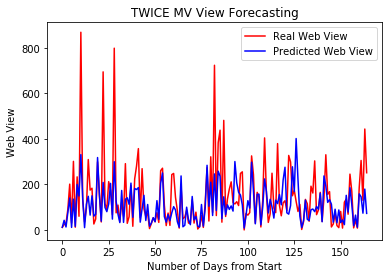

In [53]:
#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('TWICE MV View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

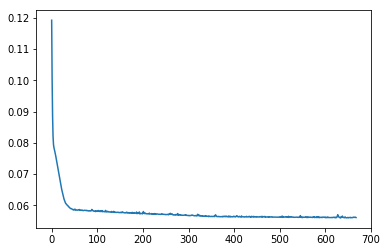

In [38]:
plt.plot(history.history['loss'])

In [39]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

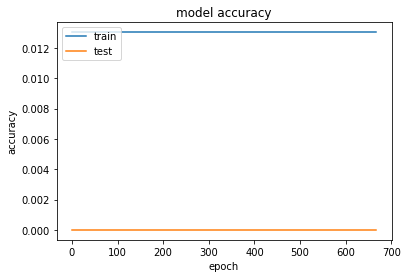

In [40]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Build RNN model

In [41]:
def build_SimpleRNN():
    # Initialising Neural Network
    model = Sequential()

    # Adding the input layerand the LSTM layer
    model.add(SimpleRNN(units = 5, activation = 'elu', input_shape = (None, 1)))


    # Adding the output layer
    model.add(Dense(units = 1))

    # Compiling the RNN
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    return model

In [42]:
regressor = build_SimpleRNN()

In [43]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

history = regressor.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=2,
  callbacks=[early_stop])

Train on 307 samples, validate on 77 samples
Epoch 1/1000
 - 0s - loss: 0.0219 - val_loss: 0.0123
Epoch 2/1000
 - 0s - loss: 0.0157 - val_loss: 0.0093
Epoch 3/1000
 - 0s - loss: 0.0130 - val_loss: 0.0088
Epoch 4/1000
 - 0s - loss: 0.0123 - val_loss: 0.0089
Epoch 5/1000
 - 0s - loss: 0.0123 - val_loss: 0.0089
Epoch 6/1000
 - 0s - loss: 0.0120 - val_loss: 0.0087
Epoch 7/1000
 - 0s - loss: 0.0117 - val_loss: 0.0085
Epoch 8/1000
 - 0s - loss: 0.0115 - val_loss: 0.0084
Epoch 9/1000
 - 0s - loss: 0.0113 - val_loss: 0.0084
Epoch 10/1000
 - 0s - loss: 0.0112 - val_loss: 0.0083
Epoch 11/1000
 - 0s - loss: 0.0110 - val_loss: 0.0083
Epoch 12/1000
 - 0s - loss: 0.0108 - val_loss: 0.0082
Epoch 13/1000
 - 0s - loss: 0.0107 - val_loss: 0.0082
Epoch 14/1000
 - 0s - loss: 0.0106 - val_loss: 0.0082
Epoch 15/1000
 - 0s - loss: 0.0104 - val_loss: 0.0081
Epoch 16/1000
 - 0s - loss: 0.0103 - val_loss: 0.0081
Epoch 17/1000
 - 0s - loss: 0.0102 - val_loss: 0.0081
Epoch 18/1000
 - 0s - loss: 0.0101 - val_loss:

### Test

In [45]:
# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (165, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

### Visualize

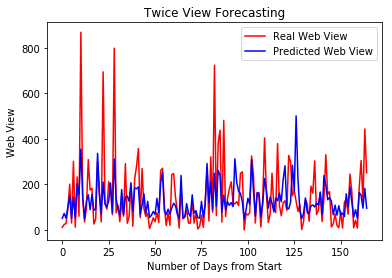

In [47]:
#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Twice View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()